In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/data/elastic-notebook/data/amex-default-prediction-feather'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/data/elastic-notebook/data/amex-default-prediction-feather/amex-default-prediction-feather.zip
/data/elastic-notebook/data/amex-default-prediction-feather/00_slim_data.ipynb
/data/elastic-notebook/data/amex-default-prediction-feather/test.feather
/data/elastic-notebook/data/amex-default-prediction-feather/train.feather


In [2]:
train_df = pd.read_feather('/data/elastic-notebook/data/amex-default-prediction-feather/train.feather')
labels_df = pd.read_csv("/data/elastic-notebook/data/amex-default-prediction/train_labels.csv")
sub_df = pd.read_csv('/data/elastic-notebook/data/amex-default-prediction/sample_submission.csv')

In [3]:
import pandas as pd
import numpy as np

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing


# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import roc_auc_score, roc_curve, auc
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
labels_df

customer_ID  target
0       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0
1       00000fd6641609c6ece5454664794f0340ad84dddce9a2...       0
2       00001b22f846c82c51f6e3958ccd81970162bae8b007e8...       0
3       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...       0
4       00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...       0
...                                                   ...     ...
458908  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...       0
458909  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...       0
458910  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...       0
458911  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...       1
458912  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...       0

[458913 rows x 2 columns]

In [5]:
sub_df

customer_ID  prediction
0       00000469ba478561f23a92a868bd366de6f6527a684c9a...           0
1       00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...           0
2       0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...           0
3       00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...           0
4       00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...           0
...                                                   ...         ...
924616  ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...           0
924617  ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...           0
924618  ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...           0
924619  ffffddef1fc3643ea179c93245b68dca0f36941cd83977...           0
924620  fffffa7cf7e453e1acc6a1426475d5cb9400859f82ff61...           0

[924621 rows x 2 columns]

In [6]:
train_df

customer_ID         S_2  \
0        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09   
1        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07   
2        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28   
3        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13   
4        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16   
...                                                    ...         ...   
5531446  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2017-11-05   
5531447  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2017-12-23   
5531448  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2018-01-06   
5531449  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2018-02-06   
5531450  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2018-03-14   

              P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0        0.938477  0.001734  0.008728  1.006836  0.009224  0.124023  0.008774   
1        0.936523  0.005775  0.004925  1.000977  0.006153  0.126709  0.000798   
2        0.954102  0.091492  0.021652  1.009766  0.006817  0.123962  0.007599   
3        0.960449  0.002455  0.013687  1.002930  0.001372  0.117188  0.000685   
4        0.947266  0.002483  0.015190  1.000977  0.007607  0.117310  0.004654   
...           ...       ...       ...       ...       ...       ...       ...   
5531446  0.979492  0.416016  0.020813  0.828125  0.003487  0.090759  0.005341   
5531447  0.984863  0.296631  0.007210  0.812500  0.005905  0.079895  0.002243   
5531448  0.982910  0.444092  0.013153  0.815430  0.003456  0.100525  0.002111   
5531449  0.969727  0.442627  0.009857  1.003906  0.005116  0.101807  0.009933   
5531450  0.981934  0.002474  0.000077  0.992676  0.000809  0.119141  0.003286   

              B_3  ...  D_136  D_137  D_138     D_139     D_140     D_141  \
0        0.004707  ...    NaN    NaN    NaN  0.002426  0.003706  0.003819   
1        0.002714  ...    NaN    NaN    NaN  0.003956  0.003166  0.005032   
2        0.009422  ...    NaN    NaN    NaN  0.003269  0.007328  0.000427   
3        0.005531  ...    NaN    NaN    NaN  0.006119  0.004517  0.003201   
4        0.009308  ...    NaN    NaN    NaN  0.003672  0.004944  0.008888   
...           ...  ...    ...    ...    ...       ...       ...       ...   
5531446  0.025146  ...    NaN    NaN    NaN  0.006836  0.003679  0.000457   
5531447  0.023697  ...    NaN    NaN    NaN  0.003309  0.007095  0.007858   
5531448  0.012344  ...    NaN    NaN    NaN  0.009956  0.009995  0.001088   
5531449  0.008575  ...    NaN    NaN    NaN  0.005543  0.006565  0.009880   
5531450  0.014091  ...    NaN    NaN    NaN  0.007317  0.002888  0.006207   

         D_142     D_143     D_144     D_145  
0          NaN  0.000569  0.000610  0.002674  
1          NaN  0.009575  0.005493  0.009216  
2          NaN  0.003429  0.006985  0.002604  
3          NaN  0.008423  0.006527  0.009598  
4          NaN  0.001670  0.008125  0.009827  
...        ...       ...       ...       ...  
5531446    NaN  0.000906  0.001497  0.002775  
5531447    NaN  0.002777  0.008224  0.008858  
5531448    NaN  0.005692  0.006775  0.005566  
5531449    NaN  0.008125  0.001168  0.003983  
5531450    NaN  0.005112  0.003183  0.001914  

[5531451 rows x 190 columns]

****DATA PREPARATION****

In [7]:
list(train_df[:1000].columns)

['customer_ID',
 'S_2',
 'P_2',
 'D_39',
 'B_1',
 'B_2',
 'R_1',
 'S_3',
 'D_41',
 'B_3',
 'D_42',
 'D_43',
 'D_44',
 'B_4',
 'D_45',
 'B_5',
 'R_2',
 'D_46',
 'D_47',
 'D_48',
 'D_49',
 'B_6',
 'B_7',
 'B_8',
 'D_50',
 'D_51',
 'B_9',
 'R_3',
 'D_52',
 'P_3',
 'B_10',
 'D_53',
 'S_5',
 'B_11',
 'S_6',
 'D_54',
 'R_4',
 'S_7',
 'B_12',
 'S_8',
 'D_55',
 'D_56',
 'B_13',
 'R_5',
 'D_58',
 'S_9',
 'B_14',
 'D_59',
 'D_60',
 'D_61',
 'B_15',
 'S_11',
 'D_62',
 'D_63',
 'D_64',
 'D_65',
 'B_16',
 'B_17',
 'B_18',
 'B_19',
 'D_66',
 'B_20',
 'D_68',
 'S_12',
 'R_6',
 'S_13',
 'B_21',
 'D_69',
 'B_22',
 'D_70',
 'D_71',
 'D_72',
 'S_15',
 'B_23',
 'D_73',
 'P_4',
 'D_74',
 'D_75',
 'D_76',
 'B_24',
 'R_7',
 'D_77',
 'B_25',
 'B_26',
 'D_78',
 'D_79',
 'R_8',
 'R_9',
 'S_16',
 'D_80',
 'R_10',
 'R_11',
 'B_27',
 'D_81',
 'D_82',
 'S_17',
 'R_12',
 'B_28',
 'R_13',
 'D_83',
 'R_14',
 'R_15',
 'D_84',
 'R_16',
 'B_29',
 'B_30',
 'S_18',
 'D_86',
 'D_87',
 'R_17',
 'R_18',
 'D_88',
 'B_31',
 'S_

In [8]:
len(train_df.customer_ID.unique())

458913

In [9]:
train_df.customer_ID.value_counts()

0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    13
a3111280bfa1ed8fafd0b06839eb707f4538497e8087cb62958bb03e1bdde214    13
a31376930229162f886c091e5a56a528f81c10a523285828ed05a6e9ccf56722    13
a312c595dfaee96c8a597107d2754a49b1acfd127400d98991762d87837b1b65    13
a312aff722e7230f9d6a313ff777d6f00166c6bada21a333982426758a2e2a9d    13
                                                                    ..
a84839802f1f37a86a7fe34ddba4791d33d878df3937b509841def0a9e252748     1
01f4f7b14d83b6a8f88e4355279224615da083b19e3e5f15b98f274ced8cf752     1
eef07ea56302cebcd57374c6565bb3e5c7af856796d9cbc31ed42aa0fc73b7fc     1
d192480082e86e3b4da68f014b284f2a2624b45956eed279416c796de043b7ce     1
d9ea3cffff889b522a69bde89aee382dcff8bffe32c9a38653bdaa2ff4330041     1
Name: customer_ID, Length: 458913, dtype: int64

In [10]:
train_df.groupby('customer_ID').size()

customer_ID
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    13
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5    13
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1    13
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc    13
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed    13
                                                                    ..
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7    13
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286    13
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6    13
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145b2c3d01967fcce461    13
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681    13
Length: 458913, dtype: int64

In [11]:
train_df.isna().sum()

customer_ID          0
S_2                  0
P_2              45985
D_39                 0
B_1                  0
                ...   
D_141           101548
D_142          4587043
D_143           101548
D_144            40727
D_145           101548
Length: 190, dtype: int64

In [12]:
perc = 75.0
min_count =  int(((100-perc)/100)*train_df.shape[0] + 1)
df = train_df.dropna( axis=1, 
                thresh=min_count)

In [13]:
df

customer_ID         S_2  \
0        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09   
1        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07   
2        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28   
3        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13   
4        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16   
...                                                    ...         ...   
5531446  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2017-11-05   
5531447  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2017-12-23   
5531448  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2018-01-06   
5531449  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2018-02-06   
5531450  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  2018-03-14   

              P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0        0.938477  0.001734  0.008728  1.006836  0.009224  0.124023  0.008774   
1        0.936523  0.005775  0.004925  1.000977  0.006153  0.126709  0.000798   
2        0.954102  0.091492  0.021652  1.009766  0.006817  0.123962  0.007599   
3        0.960449  0.002455  0.013687  1.002930  0.001372  0.117188  0.000685   
4        0.947266  0.002483  0.015190  1.000977  0.007607  0.117310  0.004654   
...           ...       ...       ...       ...       ...       ...       ...   
5531446  0.979492  0.416016  0.020813  0.828125  0.003487  0.090759  0.005341   
5531447  0.984863  0.296631  0.007210  0.812500  0.005905  0.079895  0.002243   
5531448  0.982910  0.444092  0.013153  0.815430  0.003456  0.100525  0.002111   
5531449  0.969727  0.442627  0.009857  1.003906  0.005116  0.101807  0.009933   
5531450  0.981934  0.002474  0.000077  0.992676  0.000809  0.119141  0.003286   

              B_3  ...     D_130     D_131     D_133      R_28     D_139  \
0        0.004707  ...  0.002052  0.005970  0.004345  0.001534  0.002426   
1        0.002714  ...  0.001034  0.004837  0.007496  0.004932  0.003956   
2        0.009422  ...  0.005680  0.005497  0.009224  0.009125  0.003269   
3        0.005531  ...  0.007107  0.008263  0.007206  0.002409  0.006119   
4        0.009308  ...  0.009682  0.004848  0.006313  0.004463  0.003672   
...           ...  ...       ...       ...       ...       ...       ...   
5531446  0.025146  ...  0.008896  0.004509  0.000776  0.007069  0.006836   
5531447  0.023697  ...  0.005093  0.003407  0.001741  0.002056  0.003309   
5531448  0.012344  ...  0.009148  0.002947  0.006062  0.005077  0.009956   
5531449  0.008575  ...  0.009323  0.008514  0.003811  0.008682  0.005543   
5531450  0.014091  ...  0.000633  0.001349  0.006313  0.005428  0.007317   

            D_140     D_141     D_143     D_144     D_145  
0        0.003706  0.003819  0.000569  0.000610  0.002674  
1        0.003166  0.005032  0.009575  0.005493  0.009216  
2        0.007328  0.000427  0.003429  0.006985  0.002604  
3        0.004517  0.003201  0.008423  0.006527  0.009598  
4        0.004944  0.008888  0.001670  0.008125  0.009827  
...           ...       ...       ...       ...       ...  
5531446  0.003679  0.000457  0.000906  0.001497  0.002775  
5531447  0.007095  0.007858  0.002777  0.008224  0.008858  
5531448  0.009995  0.001088  0.005692  0.006775  0.005566  
5531449  0.006565  0.009880  0.008125  0.001168  0.003983  
5531450  0.002888  0.006207  0.005112  0.003183  0.001914  

[5531451 rows x 168 columns]

In [14]:
cols = df.columns
cols = [cols[0]]+sorted(cols[1:-1],key = lambda k:k[0])+[cols[-1]]

In [15]:
df = df[cols]

In [16]:
df

customer_ID       B_1  \
0        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.008728   
1        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.004925   
2        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.021652   
3        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.013687   
4        0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.015190   
...                                                    ...       ...   
5531446  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  0.020813   
5531447  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  0.007210   
5531448  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  0.013153   
5531449  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  0.009857   
5531450  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...  0.000077   

              B_2       B_3       B_4       B_5       B_6       B_7       B_8  \
0        1.006836  0.004707  0.080994  0.170654  0.063904  0.059418  0.006466   
1        1.000977  0.002714  0.069397  0.113220  0.065247  0.057739  0.001614   
2        1.009766  0.009422  0.068848  0.060486  0.066956  0.056641  0.005127   
3        1.002930  0.005531  0.055634  0.166748  0.083740  0.049255  0.001417   
4        1.000977  0.009308  0.038849  0.143677  0.075928  0.048920  0.001199   
...           ...       ...       ...       ...       ...       ...       ...   
5531446  0.828125  0.025146  0.000029  0.035583  0.122742  0.018127  0.000668   
5531447  0.812500  0.023697  0.014351  0.029617  0.171509  0.021851  0.006863   
5531448  0.815430  0.012344  0.016418  0.011856  0.181763  0.016144  0.002050   
5531449  1.003906  0.008575  0.004425  0.019531  0.161865  0.014801  0.001910   
5531450  0.992676  0.014091  0.018341  0.006618  0.233154  0.028183  0.007919   

              B_9  ...      S_18      S_19      S_20      S_22      S_23  \
0        0.008209  ...  0.005722  0.002537  0.009705  0.894043  0.135620   
1        0.008369  ...  0.007584  0.008430  0.009926  0.902344  0.136353   
2        0.009354  ...  0.005901  0.007328  0.008446  0.939453  0.134888   
3        0.006783  ...  0.002520  0.007053  0.006615  0.913086  0.140015   
4        0.000519  ...  0.000155  0.007729  0.005512  0.920898  0.131592   
...           ...  ...       ...       ...       ...       ...       ...   
5531446  0.013779  ...  0.000671  0.003172  0.004444  0.971680  0.132080   
5531447  0.005646  ...  0.000642  0.009407  0.007980  0.878906  0.137573   
5531448  0.004089  ...  0.003941  0.006901  0.007488  0.862793  0.138672   
5531449  0.006626  ...  0.001741  0.005463  0.005035  0.872559  0.131958   
5531450  0.001976  ...  0.008362  0.006031  0.009262  0.295166  0.131592   

             S_24      S_25      S_26      S_27     D_145  
0        0.911133  0.974609  0.001244  0.676758  0.002674  
1        0.919922  0.975586  0.004562  0.822266  0.009216  
2        0.958496  0.974121  0.011734  0.853516  0.002604  
3        0.926270  0.975586  0.007572  0.844727  0.009598  
4        0.933594  0.978027  0.018204  0.811035  0.009827  
...           ...       ...       ...       ...       ...  
5531446  0.975098  0.970703  0.006207  0.257324  0.002775  
5531447  0.900391  0.974609  0.004723  0.253906  0.008858  
5531448  0.883301  0.972656  0.002911  0.345459  0.005566  
5531449  0.886230  0.976074  0.001878  0.208496  0.003983  
5531450  0.080505  0.974609  0.005348  0.000567  0.001914  

[5531451 rows x 168 columns]

In [17]:
pd.options.mode.chained_assignment = None
df['S_2'] = pd.to_datetime(df['S_2'])

In [18]:
pd.options.mode.chained_assignment = None
df['dayofweek'] = df['S_2'].dt.dayofweek
df['month'] = df['S_2'].dt.month
df['year'] = df['S_2'].dt.year

In [19]:
df= df.drop('S_2',axis =1)
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [20]:
df1 = df[:200000]
df1.describe()

B_1            B_2           B_3           B_4           B_5  \
count  200000.000000  199928.000000  1.999280e+05  2.000000e+05  2.000000e+05   
mean        0.000000            NaN  0.000000e+00  0.000000e+00  0.000000e+00   
std         0.213501       0.000000  2.348633e-01  2.232666e-01  5.024414e-01   
min        -0.899414       0.000003  1.192093e-07  4.768372e-07  1.788139e-07   
25%         0.008858       0.100525  5.290985e-03  2.767944e-02  7.255554e-03   
50%         0.031921       0.813965  9.872437e-03  8.331299e-02  1.513672e-02   
75%         0.129517       1.001953  1.635742e-01  2.399902e-01  5.279541e-02   
max         1.324219       1.009766  1.625000e+00  2.789062e+00  8.100000e+01   

                 B_6            B_7           B_8           B_9  \
count  199993.000000  200000.000000  1.991520e+05  2.000000e+05   
mean        0.000000       0.000000           NaN  0.000000e+00   
std         0.537109       0.232300  0.000000e+00  2.817383e-01   
min        -0.004478      -0.853027  5.960464e-08  5.960464e-08   
25%         0.020035       0.028488  4.524231e-03  5.771637e-03   
50%         0.081909       0.076782  9.056091e-03  2.629089e-02   
75%         0.191284       0.277588  1.003906e+00  3.408203e-01   
max        79.062500       1.252930  1.010742e+00  1.751562e+01   

                B_10  ...           S_23           S_24           S_25  \
count  200000.000000  ...  199991.000000  199330.000000  199516.000000   
mean        0.000000  ...       0.000000            NaN            NaN   
std              NaN  ...       0.314453       0.000000       0.000000   
min        -0.002956  ...      -8.296875     -90.500000      -2.453125   
25%         0.028275  ...       0.133423       0.795410       0.970703   
50%         0.108276  ...       0.136230       0.949219       0.973633   
75%         0.295654  ...       0.139038       0.971680       0.976562   
max       640.000000  ...      59.156250       1.053711       2.871094   

                S_26           S_27         D_145      dayofweek  \
count  199966.000000  148773.000000  1.964970e+05  200000.000000   
mean        0.000000       0.000000  0.000000e+00       2.922195   
std         0.462646       0.337402  1.901855e-01       1.921601   
min         0.000000       0.000000  5.960464e-08       0.000000   
25%         0.003405       0.006321  3.026962e-03       1.000000   
50%         0.006752       0.290283  6.061554e-03       3.000000   
75%         0.010811       0.448242  9.094238e-03       5.000000   
max        42.625000       4.640625  4.281250e+00       6.000000   

               month           year        weekend  
count  200000.000000  200000.000000  200000.000000  
mean        6.230865    2017.245420       0.424295  
std         3.489212       0.430337       0.494237  
min         1.000000    2017.000000       0.000000  
25%         3.000000    2017.000000       0.000000  
50%         6.000000    2017.000000       0.000000  
75%         9.000000    2017.000000       1.000000  
max        12.000000    2018.000000       1.000000  

[8 rows x 170 columns]

In [21]:
labels_df.describe()

target
count  458913.000000
mean        0.258934
std         0.438050
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000

In [22]:
labels_df = labels_df.set_index('customer_ID')


In [23]:
labels_df

target
customer_ID                                               
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...       0
00000fd6641609c6ece5454664794f0340ad84dddce9a26...       0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...       0
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...       0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...       0
...                                                    ...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a40...       0
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd...       0
ffff9984b999fccb2b6127635ed0736dda94e544e67e026...       0
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145...       1
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eab...       0

[458913 rows x 1 columns]

In [24]:
print('Total Number of Unique Customers: ',len(df['customer_ID'].unique()))

Total Number of Unique Customers:  458913


In [25]:
pd.options.mode.chained_assignment = None
fill_target = lambda col: labels_df.loc[col,'target']
df1['target'] = df1['customer_ID'].apply(fill_target)

In [26]:
df1.columns

Index(['customer_ID', 'B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6', 'B_7', 'B_8',
       'B_9',
       ...
       'S_24', 'S_25', 'S_26', 'S_27', 'D_145', 'dayofweek', 'month', 'year',
       'weekend', 'target'],
      dtype='object', length=172)

In [27]:
df1

customer_ID       B_1       B_2  \
0       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.008728  1.006836   
1       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.004925  1.000977   
2       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.021652  1.009766   
3       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.013687  1.002930   
4       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.015190  1.000977   
...                                                   ...       ...       ...   
199995  09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...  0.006172  1.006836   
199996  09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...  0.014534  0.816406   
199997  09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...  0.010880  0.814941   
199998  09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...  0.013901  1.008789   
199999  09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...  0.022369  1.007812   

             B_3       B_4       B_5       B_6       B_7       B_8       B_9  \
0       0.004707  0.080994  0.170654  0.063904  0.059418  0.006466  0.008209   
1       0.002714  0.069397  0.113220  0.065247  0.057739  0.001614  0.008369   
2       0.009422  0.068848  0.060486  0.066956  0.056641  0.005127  0.009354   
3       0.005531  0.055634  0.166748  0.083740  0.049255  0.001417  0.006783   
4       0.009308  0.038849  0.143677  0.075928  0.048920  0.001199  0.000519   
...          ...       ...       ...       ...       ...       ...       ...   
199995  0.014580  0.005547  0.026291  0.121399  0.019989  1.006836  0.006485   
199996  0.011436  0.020599  0.012177  0.138306  0.022339  1.006836  0.007023   
199997  0.008331  0.014221  0.012390  0.086975  0.017380  1.001953  0.004898   
199998  0.010483  0.125122  0.004986  0.079102  0.100159  1.007812  0.001398   
199999  0.003983  0.090210  0.010811  0.079773  0.076111  1.009766  0.003937   

        ...      S_24      S_25      S_26      S_27     D_145  dayofweek  \
0       ...  0.911133  0.974609  0.001244  0.676758  0.002674          3   
1       ...  0.919922  0.975586  0.004562  0.822266  0.009216          4   
2       ...  0.958496  0.974121  0.011734  0.853516  0.002604          6   
3       ...  0.926270  0.975586  0.007572  0.844727  0.009598          1   
4       ...  0.933594  0.978027  0.018204  0.811035  0.009827          6   
...     ...       ...       ...       ...       ...       ...        ...   
199995  ...  0.886719  0.979004  0.009605  0.009651  0.009178          0   
199996  ...  0.917969  0.975586  0.007866  0.009407  0.006950          4   
199997  ...  0.844238  0.975098  0.003136  0.002665  0.001202          1   
199998  ...  0.889160  0.969727  0.005028  0.006271  0.005638          3   
199999  ...  0.917969  0.978516  0.000831  0.008720  0.006577          4   

        month  year  weekend  target  
0           3  2017        0       0  
1           4  2017        1       0  
2           5  2017        1       0  
3           6  2017        0       0  
4           7  2017        1       0  
...       ...   ...      ...     ...  
199995      8  2017        0       0  
199996      9  2017        1       0  
199997     10  2017        0       0  
199998     11  2017        0       0  
199999     12  2017        1       0  

[200000 rows x 172 columns]

In [28]:
Categorical = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68','target']

In [29]:
df1[Categorical]

B_30  B_38  D_114  D_116  D_117  D_120  D_126  D_63  D_64  D_66  D_68  \
0          0     2      1      0      4      0      1     0     1    -1     6   
1          0     2      1      0      4      0      1     0     1    -1     6   
2          0     2      1      0      4      0      1     0     1    -1     6   
3          0     2      1      0      4      0      1     0     1    -1     6   
4          0     2      1      0      4      0      1     0     1    -1     6   
...      ...   ...    ...    ...    ...    ...    ...   ...   ...   ...   ...   
199995     0     3      1      0      3      0      1     1     1    -1     6   
199996     0     2      1      0      3      0      1     1     1    -1     6   
199997     0     2      1      0      3      0      1     1     1    -1     6   
199998     0     2      1      0      3      0      1     1     1    -1     6   
199999     0     2      1      0      3      0      1     1     1    -1     6   

        target  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
199995       0  
199996       0  
199997       0  
199998       0  
199999       0  

[200000 rows x 12 columns]

In [30]:
df = df.groupby('customer_ID').tail(1).set_index('customer_ID')
df = df.merge(labels_df, on='customer_ID', how='left')

In [31]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="most_frequent")
Imputed = pd.DataFrame(imputer.fit_transform(df[Categorical]),columns = Categorical)

In [32]:
#df[Categorical] = Imputed
df[Categorical] = df[Categorical].fillna(df[Categorical].mode())

In [33]:
df[Categorical].isna().sum()

B_30      0
B_38      0
D_114     0
D_116     0
D_117     0
D_120     0
D_126     0
D_63      0
D_64      0
D_66      0
D_68      0
target    0
dtype: int64

In [34]:
Numerical = df.select_dtypes(np.number).columns

In [35]:
print(Numerical)

Index(['B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9', 'B_10',
       ...
       'S_24', 'S_25', 'S_26', 'S_27', 'D_145', 'dayofweek', 'month', 'year',
       'weekend', 'target'],
      dtype='object', length=171)


****EXPLORATORY DATA ANALYSIS****

array([[<AxesSubplot: title={'center': 'B_30'}>,
        <AxesSubplot: title={'center': 'B_38'}>,
        <AxesSubplot: title={'center': 'D_114'}>],
       [<AxesSubplot: title={'center': 'D_116'}>,
        <AxesSubplot: title={'center': 'D_117'}>,
        <AxesSubplot: title={'center': 'D_120'}>],
       [<AxesSubplot: title={'center': 'D_126'}>,
        <AxesSubplot: title={'center': 'D_63'}>,
        <AxesSubplot: title={'center': 'D_64'}>],
       [<AxesSubplot: title={'center': 'D_66'}>,
        <AxesSubplot: title={'center': 'D_68'}>,
        <AxesSubplot: title={'center': 'target'}>]], dtype=object)

<Figure size 1500x1500 with 0 Axes>

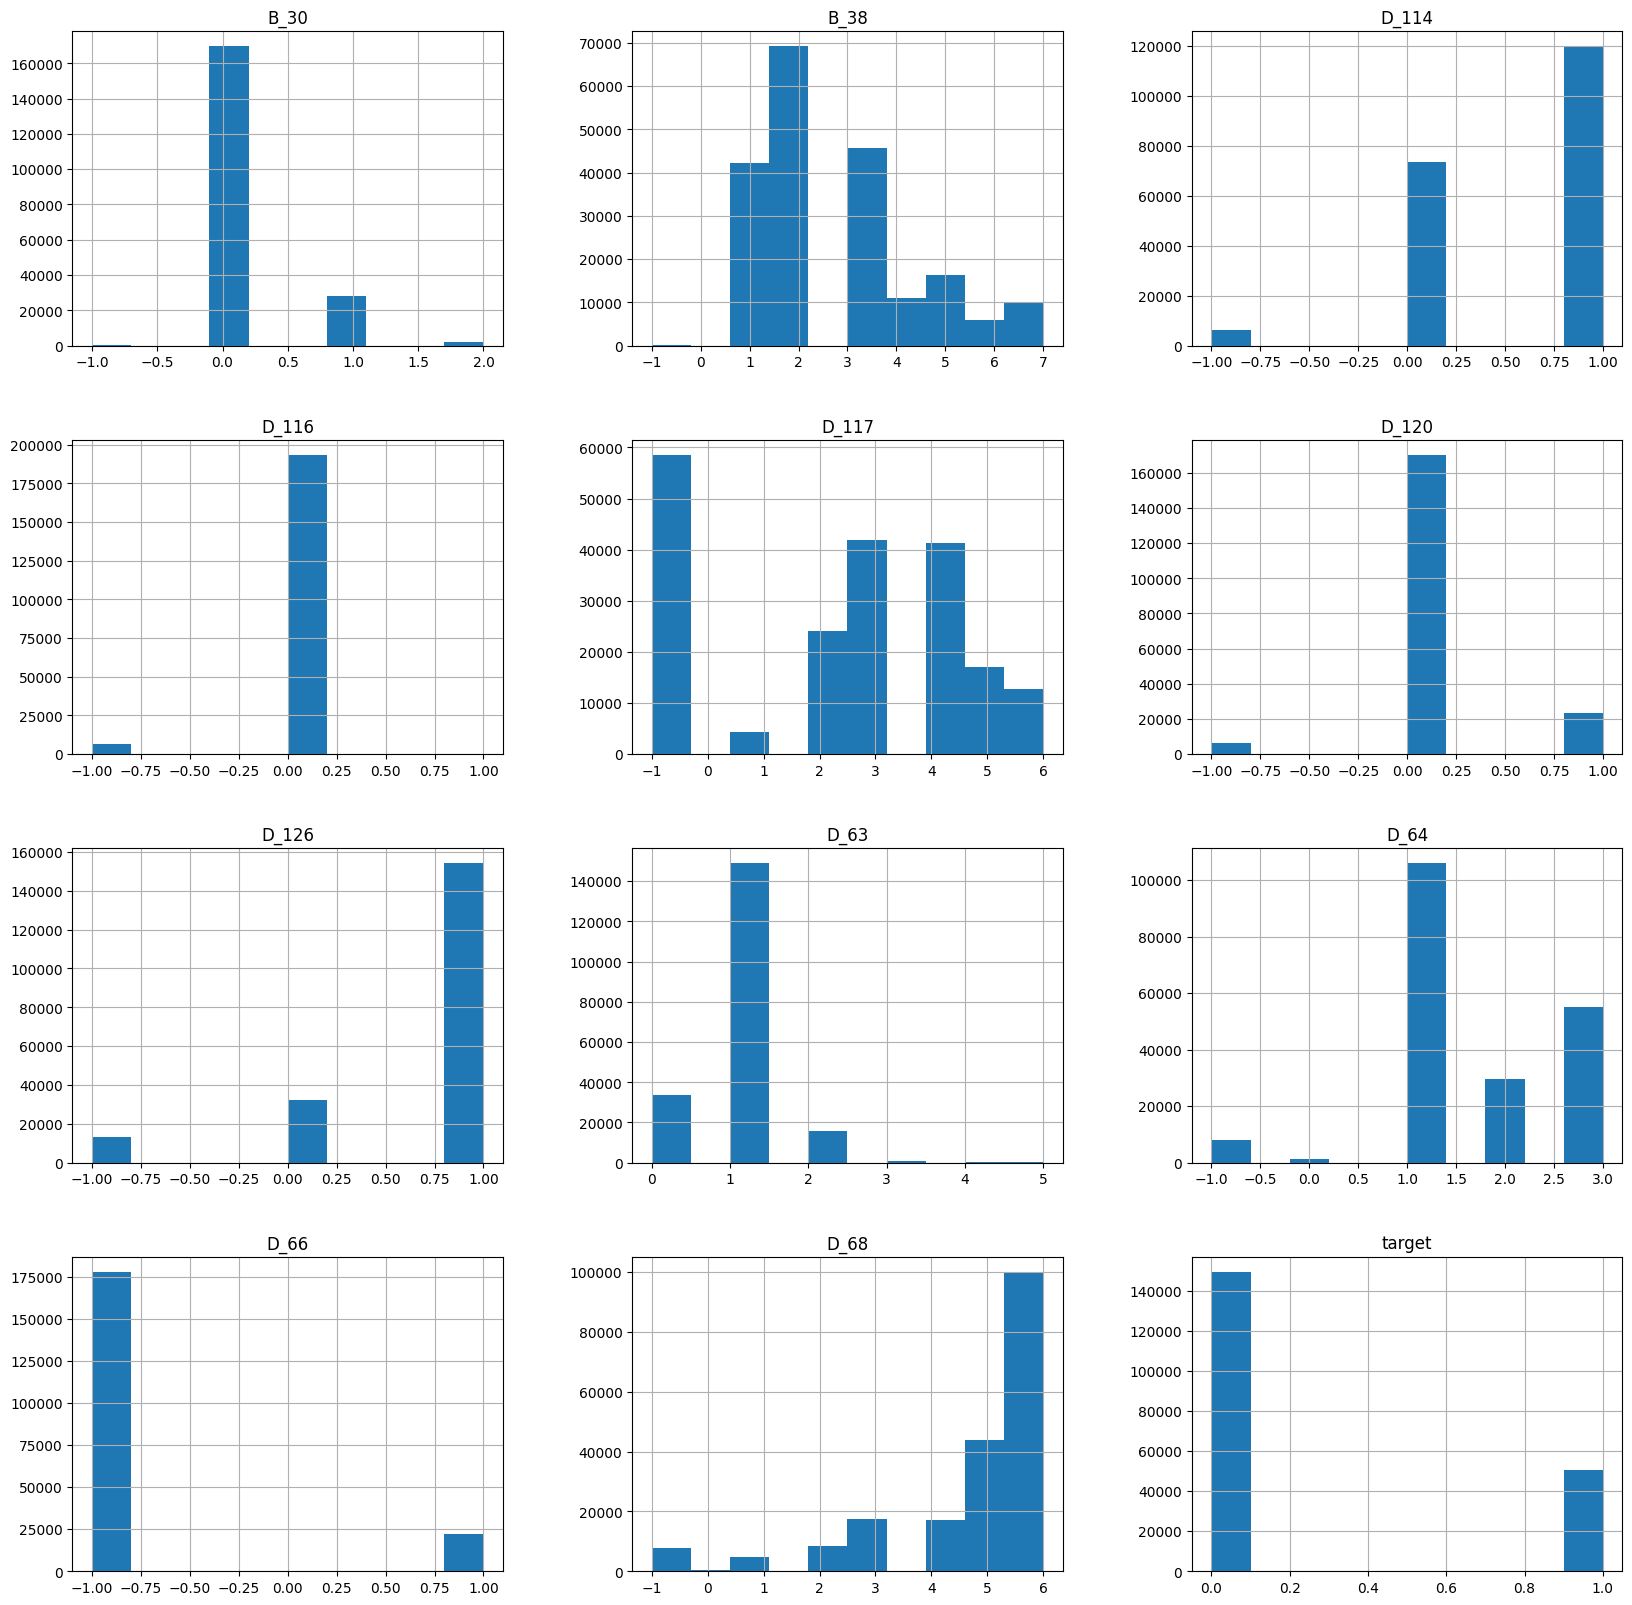

In [36]:
plt.figure(figsize = (15,15))
df1[Categorical].hist(figsize = (20,20))

<AxesSubplot: >

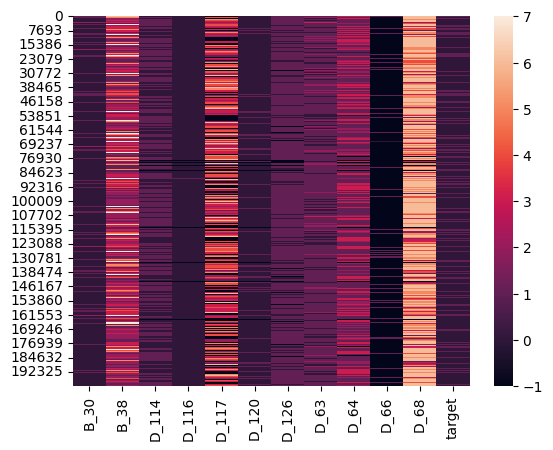

In [37]:
import seaborn
seaborn.heatmap(df1[Categorical])

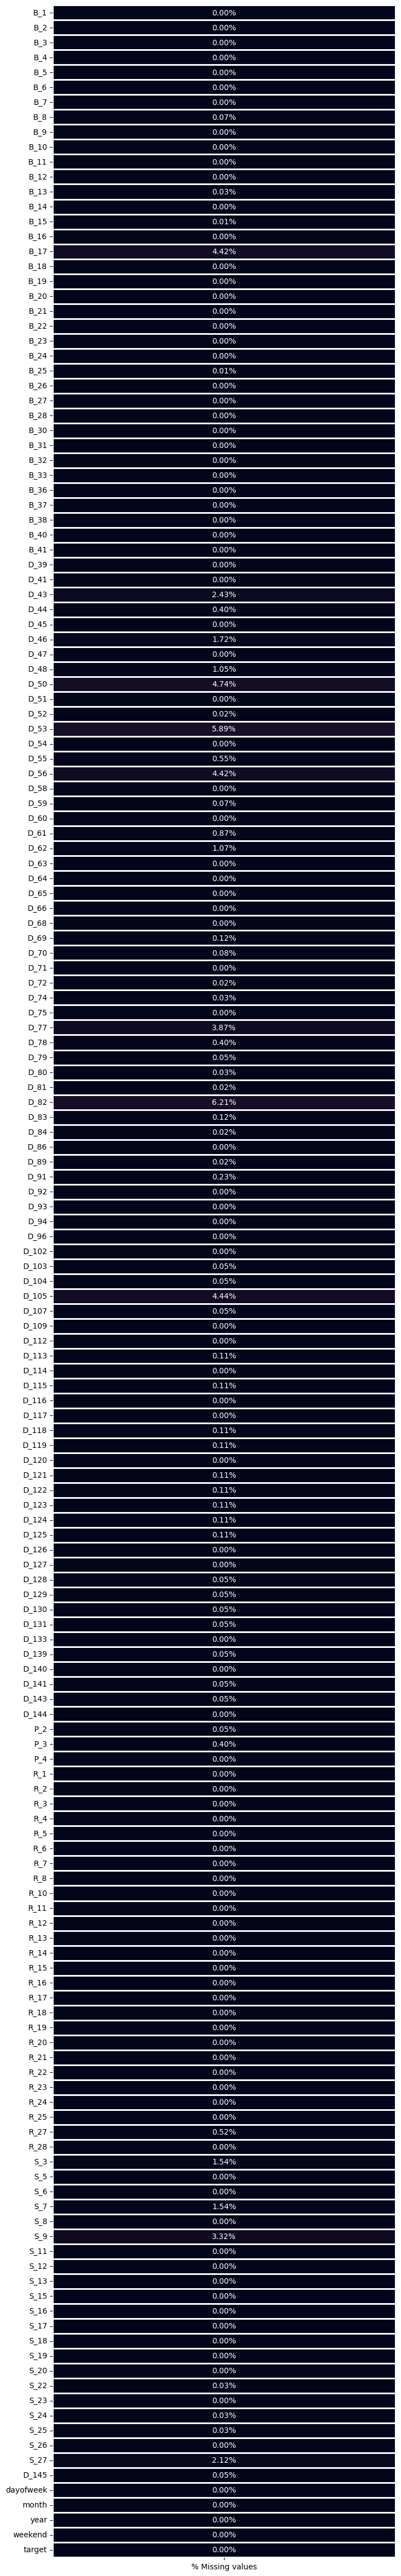

In [38]:
background_color = 'white'
missing = pd.DataFrame(columns = ['% Missing values'],data = df.isnull().sum()/len(train_df))
fig = plt.figure(figsize = (20, 60),facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
sns.heatmap(missing,cbar = False,annot = True,fmt =".2%", linewidths = 2,vmax = 1, ax = ax0)
plt.show()

<AxesSubplot: >

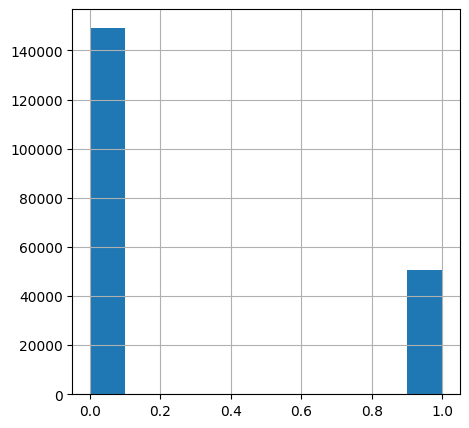

In [39]:
plt.figure(figsize = (15,15))
df1['target'].hist(figsize = (5,5))

In [40]:
df1 = df1.drop_duplicates()

In [41]:
Delinquency = [ cols for cols in df1.columns if cols[0]=='D']
Spend = [ cols for cols in df1.columns if cols[0]=='S']
Payment = [ cols for cols in df1.columns if cols[0]=='P']
Balance = [ cols for cols in df1.columns if cols[0]=='B']
Risk = [ cols for cols in df1.columns if cols[0]=='R']

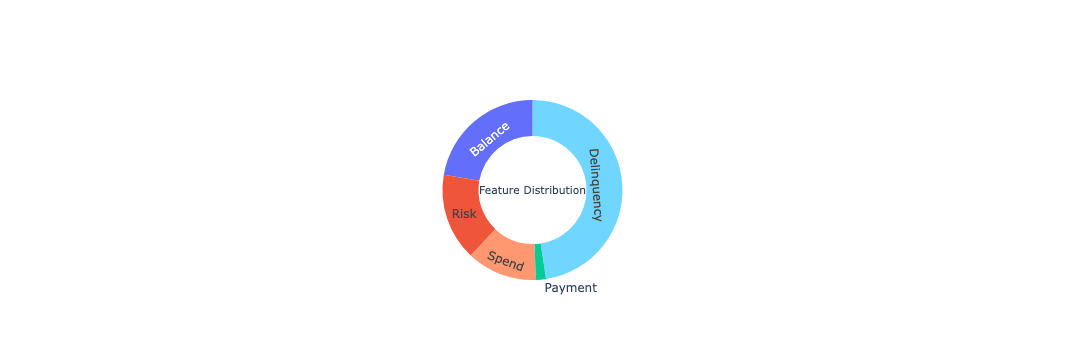

In [42]:
labels=['Delinquency', 'Spend','Payment','Balance','Risk']
values= [len(Delinquency), len(Spend),len(Payment), len(Balance),len(Risk)]
fig_1 = go.Figure()
fig_1.add_trace(go.Pie(values = values,labels = labels,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig_1.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#70d6ff","#ff9770"]),
                  title = dict(text = 'Feature Distribution'))  
fig_1.show()

In [43]:
df1[Spend].sum(axis=1)

0         6.222656
1         6.316406
2         6.964844
3         6.472656
4         6.363281
            ...   
199995    4.250000
199996    4.367188
199997    4.121094
199998    4.238281
199999    4.472656
Length: 200000, dtype: float16

In [44]:
df1[df1[Spend].sum(axis=1)>=df1[Balance].sum(axis=1)]

customer_ID       B_1       B_2  \
2       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.021652  1.009766   
59      00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...  0.000776  0.812500   
198     0002d381bdd8048d76719042cf1eb63caf53b636f8aacd...  0.017700  0.816406   
199     0002d381bdd8048d76719042cf1eb63caf53b636f8aacd...  0.018234  0.814941   
252     000391f219520dbca6c3c1c46e0fab569da163f79ee266...  0.135620  0.815918   
...                                                   ...       ...       ...   
199930  0956e6df4034f0e007c8c3a57aa260c1d10a6cb506462b...  0.076294  0.812012   
199932  0956e6df4034f0e007c8c3a57aa260c1d10a6cb506462b...  0.088318  0.241577   
199958  0956f6dbb2671e10a40180b39ea793fb73633767ef70be...  0.008598  0.812500   
199959  0956f6dbb2671e10a40180b39ea793fb73633767ef70be...  0.008591  0.816406   
199960  0956f6dbb2671e10a40180b39ea793fb73633767ef70be...  0.025238  0.814941   

             B_3       B_4       B_5       B_6       B_7       B_8       B_9  \
2       0.009422  0.068848  0.060486  0.066956  0.056641  0.005127  0.009354   
59      0.005077  0.054871  0.001202  0.195801  0.048676  0.001063  0.002924   
198     0.007118  0.005363  0.000353  0.228638  0.004620  0.007210  0.005241   
199     0.004032  0.006962  0.009567  0.229492  0.007393  0.003830  0.002569   
252     0.002007  0.248291  0.002966  0.177734  0.303467  1.007812  0.151001   
...          ...       ...       ...       ...       ...       ...       ...   
199930  0.010765  0.146973  0.005821  0.142578  0.155029  1.002930  0.451416   
199932  0.061615  0.129028  0.003233  0.067993  0.151611  1.000977  0.493164   
199958  0.004166  0.149414  0.000613  0.028900  0.184814  0.006016  0.007557   
199959  0.007626  0.147827  0.001637  0.030502  0.180420  0.003906  0.004696   
199960  0.009377  0.146851  0.002745  0.031036  0.133179  0.000822  0.007843   

        ...      S_24      S_25      S_26      S_27     D_145  dayofweek  \
2       ...  0.958496  0.974121  0.011734  0.853516  0.002604          6   
59      ...  0.919922  0.978027  0.009926       NaN  0.005486          6   
198     ...  0.942383  0.977539  0.007423       NaN  0.002190          6   
199     ...  0.938477  0.974609  0.004944  0.009476  0.004620          1   
252     ...  0.982422  0.976562  0.004345  0.007099  0.000420          6   
...     ...       ...       ...       ...       ...       ...        ...   
199930  ...  0.957520  0.972656  0.007584  0.004372  0.008774          5   
199932  ...  0.957520  0.969727  0.004593  0.375244  0.008614          6   
199958  ...  0.790527  0.972656  0.009514       NaN  0.009048          6   
199959  ...  0.801270  0.973633  0.001844       NaN  0.009315          2   
199960  ...  0.911621  0.972656  0.006081       NaN  0.001911          4   

        month  year  weekend  target  
2           5  2017        1       0  
59         10  2017        1       0  
198         3  2017        1       0  
199         4  2017        0       0  
252         2  2018        1       1  
...       ...   ...      ...     ...  
199930      8  2017        1       0  
199932     10  2017        1       0  
199958     10  2017        1       0  
199959     11  2017        0       0  
199960     12  2017        1       0  

[4845 rows x 172 columns]

In [45]:
for col in Delinquency:
    print(df1[col].unique())

[1.734e-03 5.775e-03 9.149e-02 ... 1.833e-04 1.080e-04 3.159e-06]
[8.774e-03 7.982e-04 7.599e-03 ... 8.843e-01 1.580e+00 1.162e-05]
[      nan 5.254e-01 1.260e-01 ... 2.189e-04 1.863e-03 2.169e-03]
[6.299e-04 2.525e-03 7.607e-03 ... 6.706e-05 4.663e-04 1.451e-04]
[0.709    0.713    0.7207   ... 0.003769 0.001017 0.007607]
[ 0.3586   0.3535   0.3347  ... -0.03168 -0.03104  0.1179 ]
[0.5254   0.5215   0.5244   ... 0.000973 0.003561 0.00563 ]
[0.2556   0.2234   0.1895   ... 0.001307 0.00128  0.00378 ]
[0.1487   0.1498   0.152    ... 0.00259  0.005306 0.004284]
[1.336e+00 1.340e+00 1.337e+00 ... 1.634e-04 1.959e-04 1.663e-05]
[0.2073   0.2028   0.2067   ... 0.007214 0.00622  0.00577 ]
[      nan 0.00641   0.00055   ... 0.0009384 0.000557  0.2517   ]
[ 1.002e+00  1.009e+00  1.008e+00 ...  1.448e-03 -2.761e-04  1.694e-03]
[0.3545    0.3267    0.3042    ... 0.007656  0.001659  0.0006003]
[0.152   0.1562  0.1538  ... 1.271   0.0241  0.02695]
[0.1586  0.1484  0.1395  ... 0.02603 0.02951 0.02838

In [46]:
len(Delinquency)

79

<AxesSubplot: >

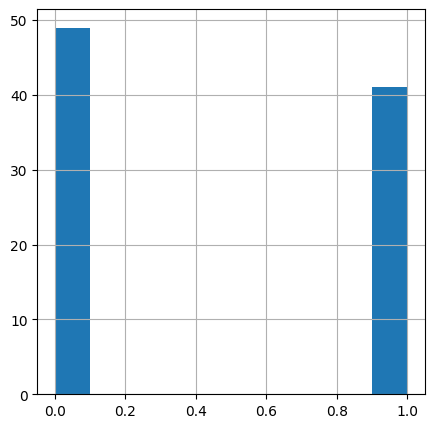

In [47]:
plt.figure(figsize = (15,15))
df1[df1[Delinquency].sum(axis=1)>=79]['target'].hist(figsize = (5,5))

In [48]:
perc_1= df1.loc[df1[Delinquency].sum(axis=1)>=79]['target'].sum()/df1.loc[df1[Delinquency].sum(axis=1)>=79].shape[0]
print('Average Percentage of Defaults for people who have more than nominal Deliquency measure: ', perc_1*100)

Average Percentage of Defaults for people who have more than nominal Deliquency measure:  45.55555555555556


<AxesSubplot: >

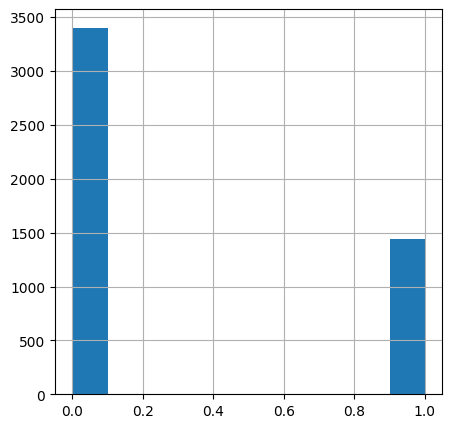

In [49]:
plt.figure(figsize = (15,15))
df1[df1[Spend].sum(axis=1)>=df1[Balance].sum(axis=1)]['target'].hist(figsize = (5,5))

In [50]:
perc_2 = df1[df1[Spend].sum(axis=1)>=df1[Balance].sum(axis=1)]['target'].sum()/df1[df1[Spend].sum(axis=1)>=df1[Balance].sum(axis=1)].shape[0]
print('Average Percentage of Defaults for people who have more spend value than balance: ', perc_2*100)

Average Percentage of Defaults for people who have more spend value than balance:  29.742002063983485


In [51]:
for col in Risk:
    print(df1[col].unique())

[9.224e-03 6.153e-03 6.817e-03 ... 9.823e-05 1.433e-02 4.193e-02]
[6.203e-03 6.207e-03 3.260e-03 ... 5.460e-05 6.759e-05 9.233e-05]
[1.423e-03 1.984e-03 7.427e-03 ... 2.236e-04 1.719e-04 9.316e-05]
[8.301e-03 5.135e-03 6.962e-03 ... 6.807e-05 3.111e-05 1.764e-05]
[1.882e-03 1.610e-03 6.329e-03 ... 9.418e-06 2.384e-05 1.585e-05]
[8.362e-03 4.028e-03 6.840e-03 ... 1.973e-04 2.088e+00 7.684e-02]
[7.561e-03 5.302e-03 1.422e-03 ... 6.782e-01 1.377e+00 2.598e+00]
[1.434e-03 5.093e-04 8.293e-03 ... 1.531e-04 2.156e-04 7.212e-06]
[7.122e-03 5.966e-03 5.447e-03 ... 8.720e-05 9.966e-05 1.000e-04]
[2.457e-03 3.953e-04 7.347e-03 ... 2.384e-04 8.637e-05 4.429e-05]
[1.01   1.004  1.005  ... 0.107  0.29   0.3333]
[3.8204e-03 3.4666e-04 2.7103e-03 ... 1.2130e-04 1.2094e-04 6.4313e-05]
[4.380e-04 4.311e-03 7.141e-03 ... 9.370e-05 4.734e-01 1.254e+00]
[6.451e-03 2.333e-03 8.362e-03 ... 5.639e-05 5.645e-05 7.308e-05]
[5.054e-03 3.754e-03 7.381e-03 ... 8.041e-05 8.053e-05 1.839e-04]
[1.9836e-04 1.1425e-03

In [52]:
len(Risk)

26

<AxesSubplot: >

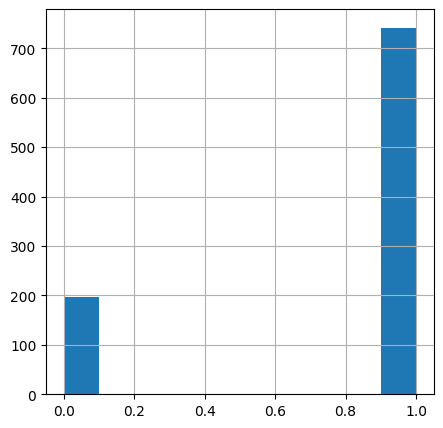

In [53]:
plt.figure(figsize = (15,15))
df1.loc[df1[Risk].sum(axis=1)>=26]['target'].hist(figsize = (5,5))

In [54]:
perc_3= df1.loc[df1[Risk].sum(axis=1)>=26]['target'].sum()/df1.loc[df1[Risk].sum(axis=1)>=26].shape[0]
print('Average Percentage of Defaults for people who have more than nominal Risk measure: ', perc_3*100)

Average Percentage of Defaults for people who have more than nominal Risk measure:  79.1044776119403


In [55]:
for col in Payment:
    print(df1[col].unique())

[0.9385  0.9365  0.954   ... 0.016   0.0201  0.01633]
[ 0.7363   0.7207   0.7383  ... -0.1097   0.0936   0.02948]
[7.553e-03 4.833e-03 6.561e-03 ... 2.508e-04 5.734e-05 8.941e-07]


<AxesSubplot: >

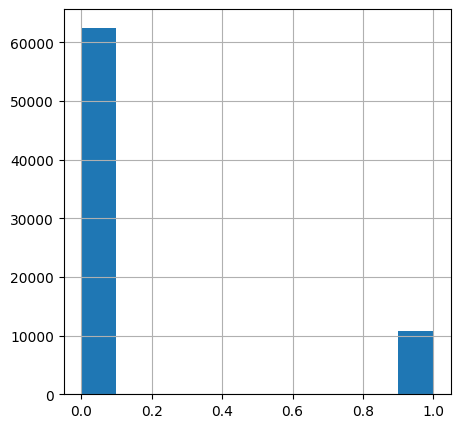

In [56]:
plt.figure(figsize = (15,15))
df1.loc[df1[Payment].sum(axis=1)>=1.5]['target'].hist(figsize = (5,5))

In [57]:
perc_4= df1.loc[df1[Payment].sum(axis=1)>=1.5]['target'].sum()/df1.loc[df1[Payment].sum(axis=1)>=1.5].shape[0]
print('Average Percentage of Defaults for people who have more than nominal Payment: ', perc_4*100)

Average Percentage of Defaults for people who have more than nominal Payment:  14.717279772950551


****FEATURE SELECTION****

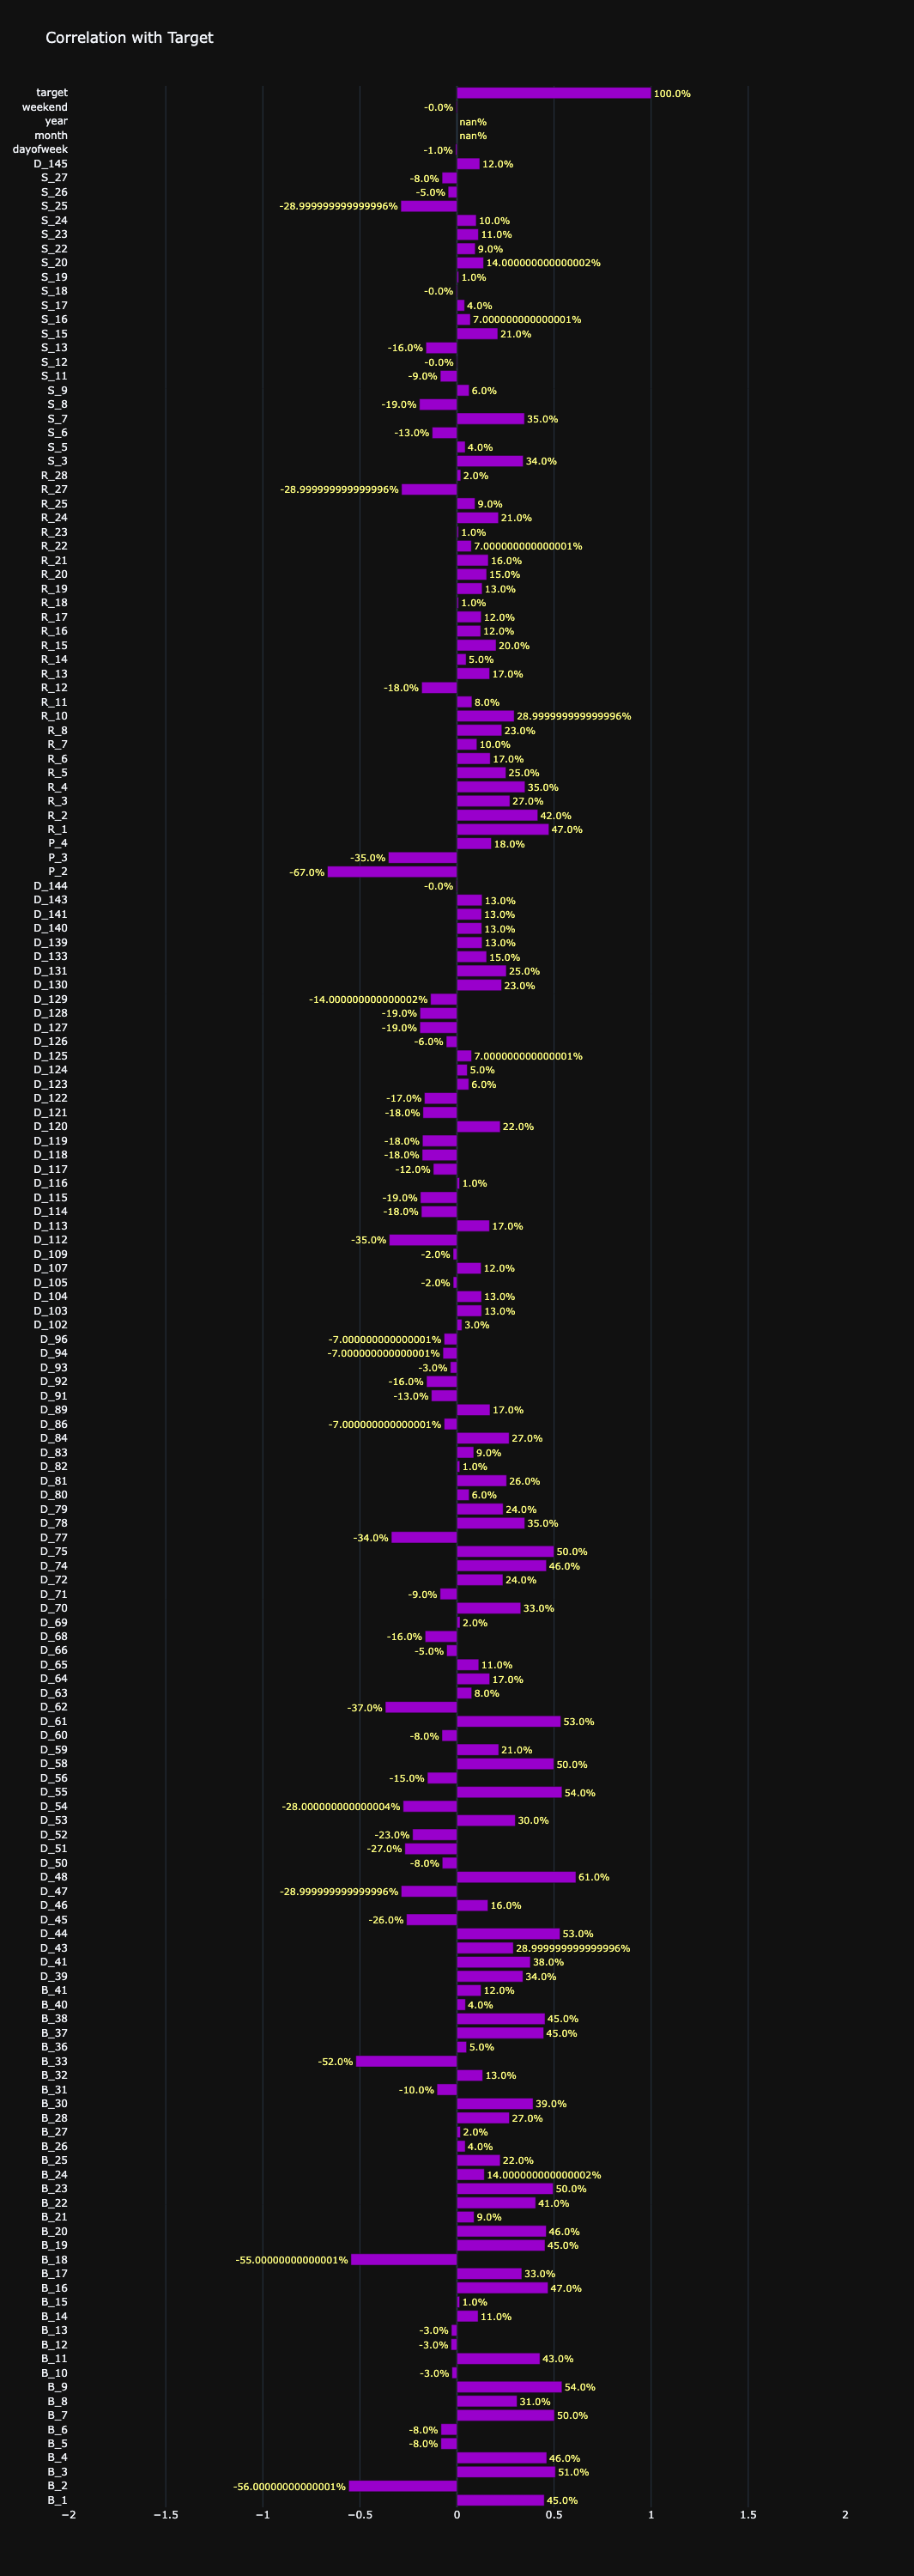

In [58]:
corr = df.corrwith(df['target'], axis=0)
val = [str(round(v ,2) *100) + '%' for v in corr.values]

fig = go.Figure()
fig.add_trace(go.Bar(y=corr.index, x= corr.values,
                     orientation='h',
                     marker_color = '#9900cc',
                     text = val,
                     textposition = 'outside',
                     textfont_color = '#ffff80'))
fig.update_layout(template = 'plotly_dark',
                  title = "Correlation with Target",
                  width = 800,
                  height = 3000)
fig.update_xaxes(range=[-2,2])

In [59]:
features = [corr.index[i] for i in range(corr.shape[0]) if abs(corr[i])>0.095 and corr.index[i]!='target']
#features = [col for col in df.columns if col not in ['target','weekend','year','month','dayofweek']]
# all_cols = df.columns
# non_use_cols = ['S_2','B_30','B_38','D_114','D_116','D_117','D_120','D_126','D_63','D_64','D_66','D_68', 'target','customer_ID','weekend','year','month','dayofweek']
# features = [col for col in all_cols if col not in non_use_cols]


In [60]:
features

['B_1',
 'B_2',
 'B_3',
 'B_4',
 'B_7',
 'B_8',
 'B_9',
 'B_11',
 'B_14',
 'B_16',
 'B_17',
 'B_18',
 'B_19',
 'B_20',
 'B_22',
 'B_23',
 'B_24',
 'B_25',
 'B_28',
 'B_30',
 'B_31',
 'B_32',
 'B_33',
 'B_37',
 'B_38',
 'B_41',
 'D_39',
 'D_41',
 'D_43',
 'D_44',
 'D_45',
 'D_46',
 'D_47',
 'D_48',
 'D_51',
 'D_52',
 'D_53',
 'D_54',
 'D_55',
 'D_56',
 'D_58',
 'D_59',
 'D_61',
 'D_62',
 'D_64',
 'D_65',
 'D_68',
 'D_70',
 'D_72',
 'D_74',
 'D_75',
 'D_77',
 'D_78',
 'D_79',
 'D_81',
 'D_84',
 'D_89',
 'D_91',
 'D_92',
 'D_103',
 'D_104',
 'D_107',
 'D_112',
 'D_113',
 'D_114',
 'D_115',
 'D_117',
 'D_118',
 'D_119',
 'D_120',
 'D_121',
 'D_122',
 'D_127',
 'D_128',
 'D_129',
 'D_130',
 'D_131',
 'D_133',
 'D_139',
 'D_140',
 'D_141',
 'D_143',
 'P_2',
 'P_3',
 'P_4',
 'R_1',
 'R_2',
 'R_3',
 'R_4',
 'R_5',
 'R_6',
 'R_7',
 'R_8',
 'R_10',
 'R_12',
 'R_13',
 'R_15',
 'R_16',
 'R_17',
 'R_19',
 'R_20',
 'R_21',
 'R_24',
 'R_27',
 'S_3',
 'S_6',
 'S_7',
 'S_8',
 'S_13',
 'S_15',
 'S_20',


In [61]:
outlier_list = []
outlier_col = []

for col in features:
    
    temp_df = df[(df[col] > df[col].mean() + df[col].std() * 200) |
                       (df[col] < df[col].mean() - df[col].std() * 200) ]
    temp_df.head()
    if len(temp_df) >0 and len(temp_df) <6 : 
        outliers = temp_df.index.to_list()
        outlier_list.extend(outliers)
        outlier_col.append(col)
        print(col, len(temp_df))
    
outlier_list = list(set(outlier_list))


In [62]:
print(outlier_list)

[]


**MODEL**

In [63]:
def amex_metric_official(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()

    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)
    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)


In [64]:
X = df[features]
y=df['target']

In [65]:
X = X.apply(pd.to_numeric, errors='coerce')
for col in features:
    X[col]  = X[col].fillna(np.mean([float(i) for i in X[col].dropna()]))

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import f1_score

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=100)

In [68]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import lightgbm as lgbm

kf = KFold(n_splits = 5)
models = []
lgbm_params ={"objective":"binary",
              "random_seed":1234,
             "n_estimators" : 2000}

for train_index, val_index in kf.split(X):
    X2_train = X.iloc[train_index]
    X2_valid = X.iloc[val_index]
    Y_train = y.iloc[train_index]
    Y_valid = y.iloc[val_index]
    
    lgbm_train = lgbm.Dataset(X2_train, Y_train)
    lgbm_eval = lgbm.Dataset(X2_valid, Y_valid, reference=lgbm_train)
    
    model_lgbm = lgbm.train(lgbm_params,
                           lgbm_train,
                           valid_sets = lgbm_eval,
                           num_boost_round = 300,
                           early_stopping_rounds = 20,
                           verbose_eval = 10,
                           )
    y_pred = model_lgbm.predict(X2_valid, num_iteration = model_lgbm.best_iteration)
    
    
    models.append(model_lgbm)

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Info] Number of positive: 94931, number of negative: 272199
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27302
[LightGBM] [Info] Number of data points in the train set: 367130, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258576 -> initscore=-1.053383
[LightGBM] [Info] Start training from score -1.053383
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.329857
[20]	valid_0's binary_logloss: 0.271594
[30]	valid_0's binary_logloss: 0.250934
[40]	valid_0's binary_logloss: 0.242344
[50]	valid_0's binary_logloss: 0.238104
[60]	valid_0's binary_logloss: 0.235572
[70]	valid_0's binary_logloss: 0.233759
[80]	valid_0's binary_logloss: 0.23251
[90]	valid_0's binary_logloss: 0.231626
[100]	valid_0's binary_logloss: 0.230867
[110]	valid_0's binary_logloss: 0.2303

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Info] Number of positive: 95066, number of negative: 272064
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27305
[LightGBM] [Info] Number of data points in the train set: 367130, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258944 -> initscore=-1.051466
[LightGBM] [Info] Start training from score -1.051466
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.328134
[20]	valid_0's binary_logloss: 0.270148
[30]	valid_0's binary_logloss: 0.249591
[40]	valid_0's binary_logloss: 0.241044
[50]	valid_0's binary_logloss: 0.236866
[60]	valid_0's binary_logloss: 0.234339
[70]	valid_0's binary_logloss: 0.232647
[80]	valid_0's binary_logloss: 0.231325
[90]	valid_0's binary_logloss: 0.23045
[100]	valid_0's binary_logloss: 0.229994
[110]	valid_0's binary_logloss: 0.2295

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Info] Number of positive: 94860, number of negative: 272270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27304
[LightGBM] [Info] Number of data points in the train set: 367130, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258383 -> initscore=-1.054392
[LightGBM] [Info] Start training from score -1.054392
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.329161
[20]	valid_0's binary_logloss: 0.270366
[30]	valid_0's binary_logloss: 0.249434
[40]	valid_0's binary_logloss: 0.24049
[50]	valid_0's binary_logloss: 0.236187
[60]	valid_0's binary_logloss: 0.233501
[70]	valid_0's binary_logloss: 0.231699
[80]	valid_0's binary_logloss: 0.230401
[90]	valid_0's binary_logloss: 0.229498
[100]	valid_0's binary_logloss: 0.228751
[110]	valid_0's binary_logloss: 0.2282

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Info] Number of positive: 95246, number of negative: 271885
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27305
[LightGBM] [Info] Number of data points in the train set: 367131, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259433 -> initscore=-1.048916
[LightGBM] [Info] Start training from score -1.048916
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.326713
[20]	valid_0's binary_logloss: 0.268108
[30]	valid_0's binary_logloss: 0.24724
[40]	valid_0's binary_logloss: 0.238573
[50]	valid_0's binary_logloss: 0.234158
[60]	valid_0's binary_logloss: 0.231534
[70]	valid_0's binary_logloss: 0.229742
[80]	valid_0's binary_logloss: 0.228417
[90]	valid_0's binary_logloss: 0.227487
[100]	valid_0's binary_logloss: 0.226801
[110]	valid_0's binary_logloss: 0.2261

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/srv/local/data/elastic-notebook/venv/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Info] Number of positive: 95209, number of negative: 271922
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27301
[LightGBM] [Info] Number of data points in the train set: 367131, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259332 -> initscore=-1.049441
[LightGBM] [Info] Start training from score -1.049441
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.326389
[20]	valid_0's binary_logloss: 0.267776
[30]	valid_0's binary_logloss: 0.247048
[40]	valid_0's binary_logloss: 0.238461
[50]	valid_0's binary_logloss: 0.23421
[60]	valid_0's binary_logloss: 0.231801
[70]	valid_0's binary_logloss: 0.23003
[80]	valid_0's binary_logloss: 0.22872
[90]	valid_0's binary_logloss: 0.227779
[100]	valid_0's b

**Extra Trees Classiifer**

In [69]:
clf = ExtraTreesClassifier()


clf = GridSearchCV(
    estimator=clf,
    param_grid={
        'n_estimators': [10],
        'max_features': [50],
        #'min_samples_leaf': range(20,50,5),
        #'min_samples_split': range(15,36,5),
    },
    scoring='r2',
    cv=5)


****SMOTE RANDOMFOREST****

In [70]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100,n_estimators = 500)
smote_sampler = SMOTE(random_state=9)
clf = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])

In [ ]:
clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)
y_pred_prob1 = clf.predict_proba(X_test)[:,1]

In [ ]:
y_test = pd.DataFrame(y_test, columns=["target"])
y_pred1 = pd.DataFrame(y_pred1, columns=["prediction"])
y_pred_prob1 = pd.DataFrame(y_pred_prob1, columns=["prediction"])

In [ ]:
print(amex_metric_official(y_test, y_pred_prob1))

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test["target"], y_pred1["prediction"])
accuracy

****Bagging Classifier****

In [ ]:
bag = BaggingClassifier(KNeighborsClassifier(),
                             max_samples=0.5, max_features=0.5)
bag.fit(X_train,y_train)


In [ ]:
y_pred = bag.predict(X_test) # predict for the test set
y_pred_prob = bag.predict_proba(X_test)[:,1]
y_pred

In [ ]:
y_test = pd.DataFrame(y_test, columns=["target"])
y_pred = pd.DataFrame(y_pred, columns=["prediction"])
y_pred_prob = pd.DataFrame(y_pred_prob, columns=["prediction"])

In [ ]:
y_pred

In [ ]:
y_pred_prob

In [ ]:
print(amex_metric_official(y_test, y_pred_prob))

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test["target"], y_pred["prediction"])
accuracy

****XGBOOST****

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

In [ ]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [200], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

In [ ]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=2, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

In [ ]:
clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)
y_pred_prob1 = clf.predict_proba(X_test)[:,1]

In [ ]:
y_test = pd.DataFrame(y_test, columns=["target"])
y_pred1 = pd.DataFrame(y_pred1, columns=["prediction"])
y_pred_prob1 = pd.DataFrame(y_pred_prob1, columns=["prediction"])

In [ ]:
print(amex_metric_official(y_test, y_pred_prob1))

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test["target"], y_pred1["prediction"])
accuracy

In [ ]:
import joblib
joblib.dump(clf, "/data/elastic-notebook/tmp/XGBOOST_Classifier")

****LGBM****

In [ ]:
best_param= {"n_estimators":[3000],
            "learning_rate":[0.01],
            #"lambda_l2":24.60526923347014,
            "max_depth":[16],
            "subsample":[0.32],
             "bagging_freq": [3],
             #"feature_fraction":0.2,
             "random_state": [37],
             "boosting_type":['gbdt'],
             "min_child_samples": [2000],
             'objective': ['binary']

            }

In [ ]:
from lightgbm import LGBMClassifier, early_stopping

model = LGBMClassifier()

In [ ]:
clf = GridSearchCV(model, best_param, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=2, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

In [ ]:
clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)
y_pred_prob1 = clf.predict_proba(X_test)[:,1]

In [ ]:
y_test = pd.DataFrame(y_test, columns=["target"])
y_pred1 = pd.DataFrame(y_pred1, columns=["prediction"])
y_pred_prob1 = pd.DataFrame(y_pred_prob1, columns=["prediction"])

In [ ]:
print(amex_metric_official(y_test, y_pred_prob1))

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test["target"], y_pred1["prediction"])
accuracy

In [ ]:
import joblib
joblib.dump(models, "/data/elastic-notebook/tmp/XGBOOST_Classifier")